In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, Matrix

In [ ]:
def steepest_descent(f, grad, x0, alpha_update, alpha=1e-4, tol=1e-6, maxiter=100000):
    '''
        f: funcion a minimizar,
        grad: gradiente de la funcion a minimizar,
        x0: punto inicial,
        alpha_update: esquema de actualizacion de alpha (0: fijo, 1: approximation 2),
        alpha: valor inicial del tamano de paso,
        tol: tolerancia,
        maxiter: maximo de iteraciones
    '''
    
    convergence = [[],[]]

    xk = x0 # Punto inicial
    
    if alpha_update == 1:
        x = xk - alpha*grad(xk)
        prev_f = f(xk)
    elif alpha_update != 0:
        print("Ingresar valor de alpha_update correcto.\n")
        return np.full(len(x0), np.nan), convergence

    for k in range(maxiter):
        fk = f(xk)
        gk = grad(xk)
        g_norm = np.linalg.norm(gk)
        
        convergence[0].append(fk)
        convergence[1].append(np.abs(g_norm))
        # actualizacion de alpha
        if alpha_update:
            g_norm *= g_norm
            alpha = g_norm*alpha*alpha/(2*(prev_f - fk + g_norm*alpha))
        
        # calculo de proxima iteracion de la solucion
        x = xk - alpha*gk
        if np.linalg.norm(grad(x)) < tol: # evaluacion de condicion de paro
            return x, convergence
        # actualizacion de funcion y punto propuesto
        prev_f = fk
        xk = x

    return xk, convergence

In [ ]:
def steepest_descent_hessian(f, grad, hess, x0, tol=1e-6, maxiter=100000):
    '''
        f: funcion a minimizar,
        grad: gradiente de la funcion a minimizar,
        hess: hessiano de la funcion a minimizar,
        x0: punto inicial,
        alpha_update: esquema de actualizacion de alpha (0: fijo, 1: approximation 2),
        alpha: valor inicial del tamano de paso,
        tol: tolerancia,
        maxiter: maximo de iteraciones
    '''
    
    convergence = [[],[]]

    xk = x0 # Punto inicial

    for k in range(maxiter):
        gk = grad(xk)
        g_norm = np.linalg.norm(gk)
        Hk = hess(xk)
        
        convergence[0].append(f(xk))
        convergence[1].append(np.abs(g_norm))
        # actualizacion de alpha
        
        alpha = g_norm*g_norm/(gk@Hk@gk)
        
        # calculo de proxima iteracion de la solucion
        x = xk - alpha*gk
        if np.linalg.norm(grad(x)) < tol: # evaluacion de condicion de paro
            return x, convergence
        # actualizacion de punto propuesto
        xk = x

    return xk, convergence

# Rosenbrock
## Punto inicial determinado

In [13]:
def rosenbrock(x):
    n = len(x)
    resultado = 0
    for i in range(n - 1):
        resultado += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
    return resultado

def rosenbrock_gradient(x):
    n = len(x)
    gradiente = np.zeros(n)  # Inicializar el gradiente como un vector de ceros

    for i in range(n):
        if i == 0:
            # Primera componente del gradiente
            gradiente[i] = -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        elif i == n-1:
            # Última componente del gradiente
            gradiente[i] = 200 * (x[i] - x[i-1]**2)
        else:
            # Componentes intermedias del gradiente
            gradiente[i] = (
                200 * (x[i] - x[i-1]**2) -
                400 * x[i] * (x[i+1] - x[i]**2) -
                2 * (1 - x[i])
            )
    return gradiente

def rosenbrock_hessian(x):
    n = len(x)
    H = np.zeros((n, n))
    H[0, 0] = 1200 * x[0]**2 - 400 * x[1] + 2
    H[0, 1] = -400 * x[0]
    for i in range(1, n-1):
        H[i, i-1] = -400 * x[i-1]
        H[i, i] = 202 + 1200 * x[i]**2 - 400 * x[i+1]
        H[i, i+1] = -400 * x[i]
    H[-1, -2] = -400 * x[-2]
    H[-1, -1] = 200
    return H

In [14]:
n = 128
x0 = np.ones((n))
x0[0] = -1.2
x0[-2] = -1.2

### Alpha fija

Valor critico:  [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998725  0.99999365  0.99999683
  0.99999842  0.99999921  0.99999961  0.9999998   0.9999999   0.99999995
  0.99999998  0.99999999  0.99999999  1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          

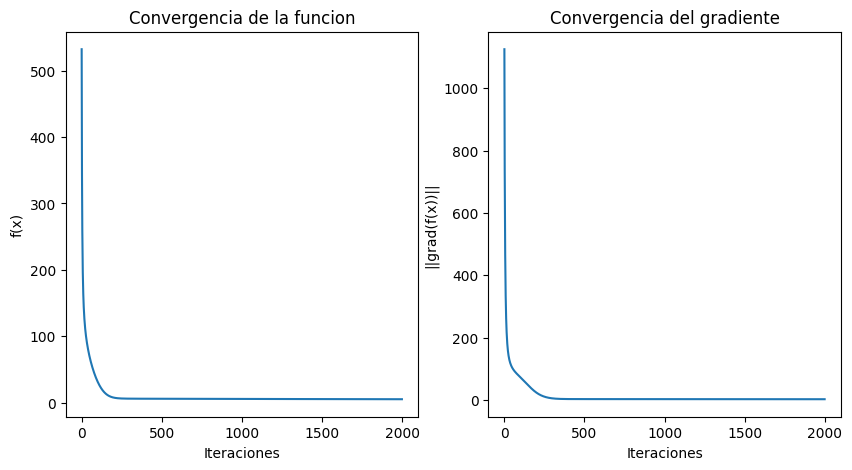

In [16]:
x_opt, convergence = steepest_descent(rosenbrock, rosenbrock_gradient, x0, 0, maxiter=2000);

print(f'Valor critico: ', x_opt)
print(f'Valor de la funcion en el punto critico: ', rosenbrock(x_opt))

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(convergence[0])
plt.title('Convergencia de la funcion')
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(convergence[1])
plt.title('Convergencia del gradiente')
plt.xlabel('Iteraciones')
plt.ylabel('||grad(f(x))||')
plt.show()

### Alpha de aproximacion 2

/tmp/ipykernel_4927/2468284483.py:33: RuntimeWarning: invalid value encountered in double_scalars
  alpha = gk_2*alpha*alpha/(2*(prev_f - fk + alpha*gk_2))


Valor critico:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
Valor de la funcion en el punto critico:  nan


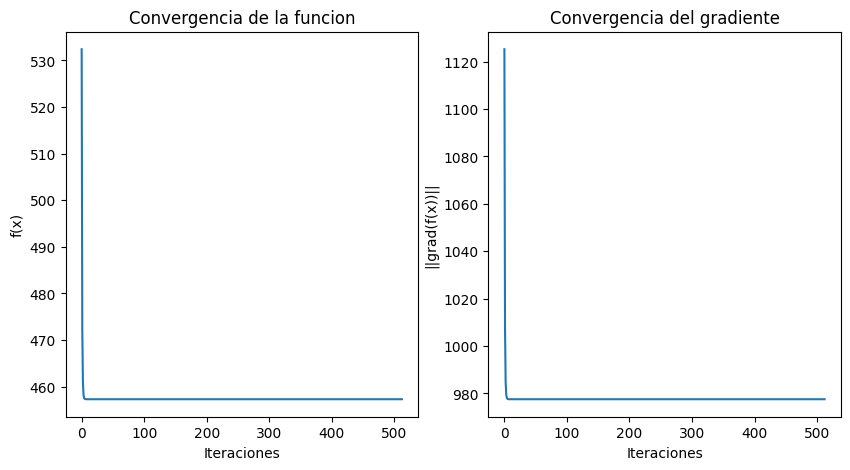

In [38]:
x_opt, convergence = steepest_descent(rosenbrock, rosenbrock_gradient, x0, 1);

print(f'Valor critico: ', x_opt)
print(f'Valor de la funcion en el punto critico: ', rosenbrock(x_opt))

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(convergence[0])
plt.title('Convergencia de la funcion')
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(convergence[1])
plt.title('Convergencia del gradiente')
plt.xlabel('Iteraciones')
plt.ylabel('||grad(f(x))||')
plt.show()

### Alpha de aproximacion 1

Valor critico:  [-0.99328598  0.99665139  0.9983298   0.99916846  0.99958427  0.99979443
  0.99989561  0.99995024  0.99997262  0.99998926  0.99999143  0.99999926
  0.99999578  1.00000206  0.99999656  1.00000305  0.99999645  1.00000359
  0.99999614  1.00000401  0.99999578  1.00000439  0.99999542  1.00000475
  0.99999507  1.00000509  0.99999474  1.00000542  0.99999442  1.00000573
  0.99999412  1.00000603  0.99999383  1.00000631  0.99999356  1.00000657
  0.99999331  1.00000681  0.99999307  1.00000704  0.99999285  1.00000725
  0.99999265  1.00000744  0.99999247  1.00000762  0.9999923   1.00000777
  0.99999215  1.00000791  0.99999202  1.00000804  0.99999191  1.00000814
  0.99999181  1.00000823  0.99999174  1.00000829  0.99999168  1.00000835
  0.99999163  1.00000838  0.99999161  1.00000839  0.99999161  1.00000839
  0.99999162  1.00000836  0.99999165  1.00000832  0.9999917   1.00000826
  0.99999177  1.00000818  0.99999187  1.00000808  0.99999198  1.00000796
  0.99999211  1.00000782  0.9999922

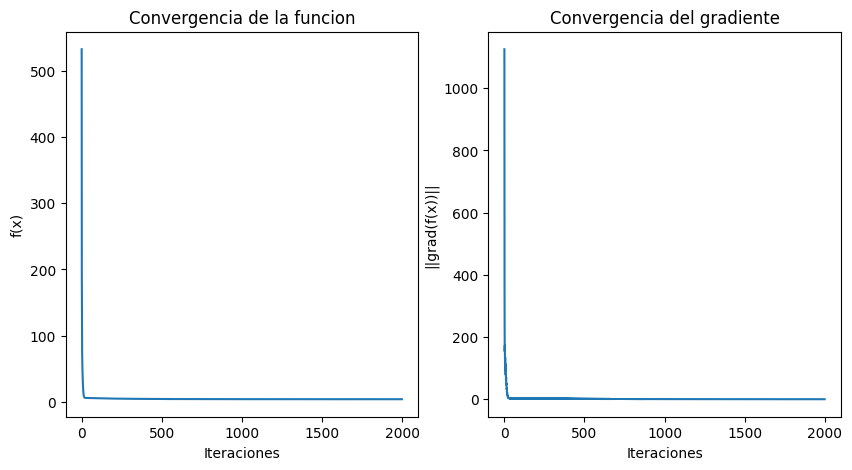

In [31]:
x_opt, convergence = steepest_descent_hessian(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, x0, maxiter=2000);

print(f'Valor critico: ', x_opt)
print(f'Valor de la funcion en el punto critico: ', rosenbrock(x_opt))

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(convergence[0])
plt.title('Convergencia de la funcion')
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(convergence[1])
plt.title('Convergencia del gradiente')
plt.xlabel('Iteraciones')
plt.ylabel('||grad(f(x))||')
plt.show()

## Punto inicial aleatorio

In [47]:
np.random.seed(0)
n = 128
x0 = np.random.rand(n) + 0.5

### Alpha fija

Valor critico:  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

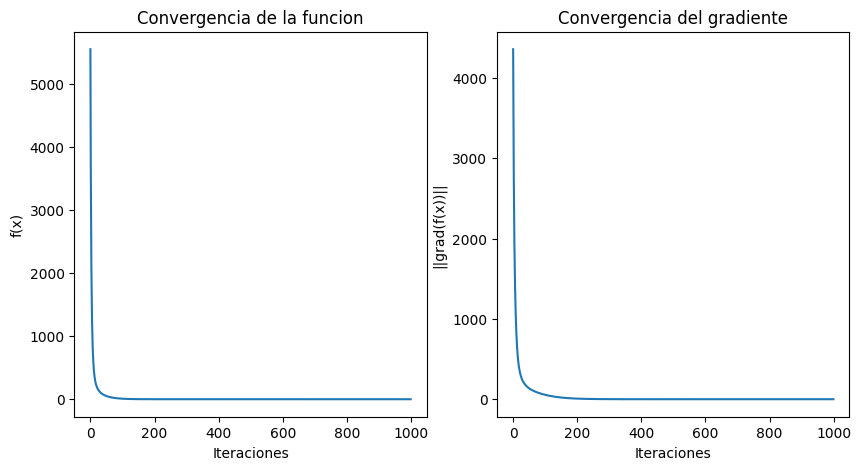

In [55]:
x_opt, convergence = steepest_descent(rosenbrock, rosenbrock_gradient, x0, 0, maxiter=1000);

print(f'Valor critico: ', x_opt)
print(f'Valor de la funcion en el punto critico: ', rosenbrock(x_opt))

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(convergence[0])
plt.title('Convergencia de la funcion')
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(convergence[1])
plt.title('Convergencia del gradiente')
plt.xlabel('Iteraciones')
plt.ylabel('||grad(f(x))||')
plt.show()

### Alpha de aproximacion 2

/tmp/ipykernel_4927/2468284483.py:33: RuntimeWarning: invalid value encountered in double_scalars
  alpha = gk_2*alpha*alpha/(2*(prev_f - fk + alpha*gk_2))


Valor critico:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
Valor de la funcion en el punto critico:  nan


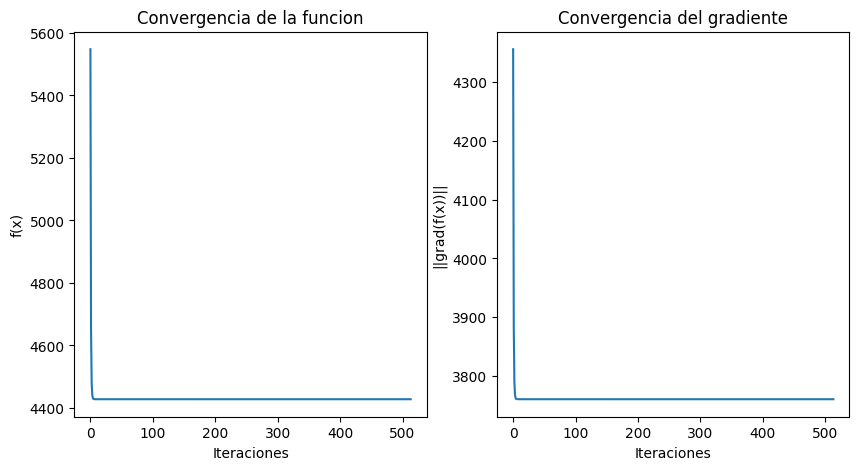

In [48]:
x_opt, convergence = steepest_descent(rosenbrock, rosenbrock_gradient, x0, 1);

print(f'Valor critico: ', x_opt)
print(f'Valor de la funcion en el punto critico: ', rosenbrock(x_opt))

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(convergence[0])
plt.title('Convergencia de la funcion')
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(convergence[1])
plt.title('Convergencia del gradiente')
plt.xlabel('Iteraciones')
plt.ylabel('||grad(f(x))||')
plt.show()

### Alpha de aproximacion 1

Valor critico:  [1.00000025 0.99999938 1.00000099 0.99999864 1.00000172 0.99999791
 1.00000244 0.9999972  1.00000314 0.99999652 1.00000381 0.99999586
 1.00000446 0.99999524 1.00000506 0.99999465 1.00000563 0.99999411
 1.00000615 0.99999361 1.00000662 0.99999316 1.00000705 0.99999275
 1.00000743 0.9999924  1.00000775 0.99999211 1.00000802 0.99999186
 1.00000824 0.99999166 1.00000841 0.99999152 1.00000853 0.99999142
 1.00000861 0.99999137 1.00000864 0.99999136 1.00000862 0.9999914
 1.00000857 0.99999147 1.00000849 0.99999157 1.00000837 0.9999917
 1.00000822 0.99999186 1.00000805 0.99999204 1.00000786 0.99999225
 1.00000765 0.99999246 1.00000742 0.99999269 1.00000719 0.99999293
 1.00000694 0.99999318 1.00000669 0.99999343 1.00000644 0.99999368
 1.00000619 0.99999393 1.00000594 0.99999418 1.00000569 0.99999443
 1.00000545 0.99999468 1.0000052  0.99999491 1.00000497 0.99999515
 1.00000474 0.99999537 1.00000452 0.99999559 1.0000043  0.99999581
 1.00000408 0.99999602 1.00000387 0.99999623 1.0

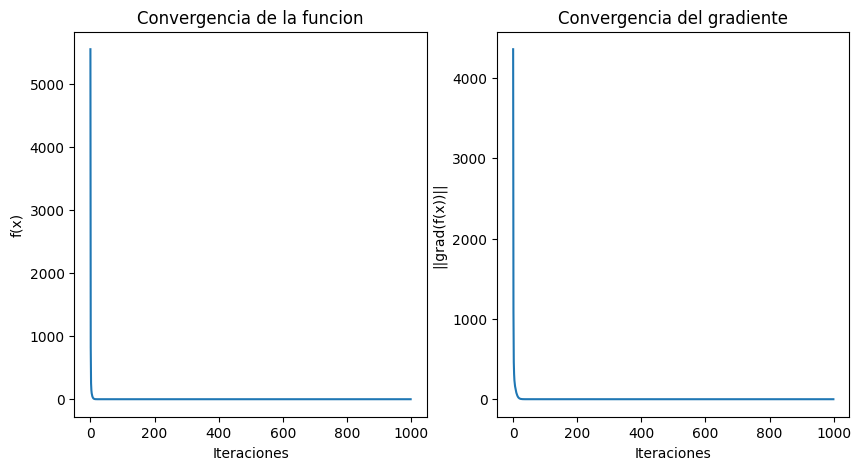

In [51]:
x_opt, convergence = steepest_descent_hessian(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, x0, maxiter=1000);

print(f'Valor critico: ', x_opt)
print(f'Valor de la funcion en el punto critico: ', rosenbrock(x_opt))

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(convergence[0])
plt.title('Convergencia de la funcion')
plt.xlabel('Iteraciones')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(convergence[1])
plt.title('Convergencia del gradiente')
plt.xlabel('Iteraciones')
plt.ylabel('||grad(f(x))||')
plt.show()

# MDS

In [22]:
import pandas as pd

In [ ]:
def distance_matrix(X):
    n = X.shape[0]
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i,j] = np.linalg.norm(X[i] - X[j])
    return D

def msd(Z, D):
    """
    Calcula la función de costo para el algoritmo MDS.
    Z: np.array de forma (m, 2), puntos en el espacio reducido.
    D: np.array de forma (m, m), matriz de distancias originales en alta dimensión.
    """
    m = Z.shape[0]
    L = 0
    for i in range(m):
        for j in range(i + 1, m):
            dist_ij = np.linalg.norm(Z[i] - Z[j])  # Distancia en R^2
            error = (D[i, j] - dist_ij)  # Diferencia con la distancia original
            L += error ** 2  # Suma de errores cuadráticos
    return L

def msd_gradient(Z, D):
    """
    Calcula el gradiente G de la función de costo L(Z) para MDS.
    Z: np.array de forma (m, 2), puntos en el espacio reducido.
    D: np.array de forma (m, m), matriz de distancias originales en alta dimensión.
    """
    m = Z.shape[0]
    G = np.zeros_like(Z)

    for i in range(m):
        for j in range(i + 1, m):
            dist_ij = np.linalg.norm(Z[i] - Z[j])  # Distancia en 2D
            if dist_ij != 0:
                error = (D[i, j] - dist_ij)
                grad = -2 * error * (Z[i] - Z[j]) / dist_ij  # Gradiente parcial
                G[i] += grad
                G[j] -= grad  # Simétrico

    return G



In [26]:
def steepest_descent_msd(X, d, alpha=1e-4, tol=1e-6, maxiter=100000):
    '''
        X: matriz de datos,
        d: dimension de los nuevos puntos
        alpha: valor del tamano de paso,
        tol: tolerancia,
        maxiter: maximo de iteraciones
    '''
    
    D = distance_matrix(X)
    Z = np.random.rand(X.shape[0],d)

    for i in range(maxiter):
        L = msd(Z,D)
        G = msd_gradient(Z, D)

        Z -= alpha*G
        if np.linalg.norm(G) < tol:
            break
    return Z


In [27]:
X = pd.read_csv('iris.csv').iloc[:,0:4].values
Specie = pd.read_csv('iris.csv').iloc[:,4].values

In [29]:
Y = steepest_descent_msd(X, 2)

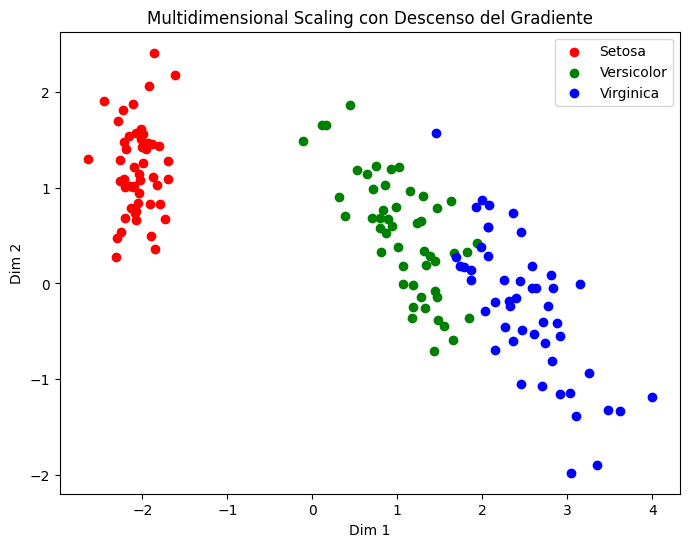

In [30]:
species_colors = {s: c for s, c in zip(np.unique(Specie), ["r", "g", "b"])}
plt.figure(figsize=(8, 6))
for i in range(len(Y)):
    plt.scatter(Y[i, 0], Y[i, 1], color=species_colors[Specie[i]], label=Specie[i] if i in [0, 50, 100] else "")
plt.legend()
plt.title("Multidimensional Scaling con Descenso del Gradiente")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()